# Домашнее задание 1

### Задание 1

**a)** По формуле ковариации имеем: $ cov(\hat{F}_n(x), \hat{F}_n(y)) = \mathbb{E}[\hat{F}_n(x)\hat{F}_n(y)] - \mathbb{E}\hat{F}_n(x)\mathbb{E}\hat{F}_n(y) $

Поскольку $\hat{F}_n $ $ - $ эмпирическая функция распределения, то по ее свойству: $\mathbb{E}\hat{F}_n(x) = F(x)$, $\mathbb{E}\hat{F}_n(y) = F(y)$.

$\mathbb{E}[\hat{F}_n(x)\hat{F}_n(y)] = $ [по определению эмпирической ф.р.] $ = \mathbb{E}\left[\dfrac1{n^2} \sum\limits^{n}_{i, j} I \lbrace X_i \leq x, X_j \leq y \rbrace \right]  = $ [линейность МО] $ = $ $ = \dfrac1{n^2} \sum\limits^{n}_{i, j} \mathbb{E} I \lbrace X_i \leq x, X_j \leq y \rbrace = \dfrac1{n^2} \sum\limits^{n}_{i \ne j} P(X_i \leq x, X_j \leq y) + \dfrac1{n^2} \sum\limits^{n}_{i = j} P(X_i \leq x, X_j \leq y) = $ [т.к. $X_i$ независимы] $ = $ $ = \dfrac1{n^2} \sum\limits^{n}_{i \ne j} P(X_i \leq x)P(X_j \leq y) + \dfrac1{n^2} \sum\limits^{n}_{i = 1} P(X_i \leq \min(x, y)) = \dfrac{n(n-1)}{n^2} F(x)F(y) + \dfrac{n}{n^2} F(\min(x, y)) = \dfrac{(n-1)F(x)F(y) + F(\min(x, y))}{n} $

Таким образом, искомая  $ cov(\hat{F}_n(x), \hat{F}_n(y)) = \dfrac{(n-1)F(x)F(y) + F(\min(x, y))}{n} - F(x)F(y) = \dfrac{F(\min(x, y)) - F(x)F(y)}{n}$

** b) ** По cвойствам билинейности и симметричности ковариации для любых двух случайных величин $X$ и $Y$: 

$\mathbb{V}[X-Y] = cov(X-Y, X-Y) = cov(X,X) + cov(X, -Y) + cov(-Y, X) + cov(Y, Y) = \mathbb{V}X + \mathbb{V}Y - 2cov(X, Y)$

Поскольку $\hat{F}_n $ $ - $ эмпирическая функция распределения, то по ее свойству: $\mathbb{V}\hat{F}_n(x) = \dfrac{F(x)(1-F(x))}{n}$ $(\star)$

Тогда

$$\mathbb{V}\hat{\theta} = \mathbb{V}[\hat{F}_n(a) - \hat{F}_n(b)] = \mathbb{V}\hat{F}_n(a) + \mathbb{V}\hat{F}_n(b) - 2cov(\hat{F}_n(a), \hat{F}_n(b)) =  [\text{по пункту а) (здесь }a < b\text{) и }(\star)]  = $$ 
$$ = \dfrac{F(a)(1-F(a))}{n} + \dfrac{F(b)(1-F(b))}{n} - \dfrac{2 F(a)(1-F(b))}{n} =$$
$$ = \frac{F(b) - F(a) - (F(b) - F(a))^2}{n} = \frac{(F(b) - F(a))(1 - (F(b) - F(a)))}{n} = \frac{\theta(1-\theta)}{n}$$

Значит, $se(\hat{\theta}) = \sqrt{\mathbb{V}\hat{\theta}} = \sqrt{\dfrac{\theta(1-\theta)}{n}}$.

Заметим, что $T(F)$ - линейный статистический функционал, т.к. $T(kF) = kF(a) - kF(b) = kT(F)$ и $T(F+G) = F(a) + G(a) - (F(b) + G(b))$ = $T(F) + T(G)$. Поэтому $T(\hat{F}_n) \approx \mathcal{N}(T(F), \hat{se}^2)$, где $\hat{se}$ $-$ оценка для стандартного отклонения $T(\hat{F}_n)$,  и доверительный интервал для $T(F)$ с доберительной вероятностью $1-\alpha$ будет иметь вид: $$T(\hat{F}_n) \pm z_{\alpha/2}\hat{se}$$

В данном случае по посчитанному ранее получим, что приближенный доверительный интервал размера $1-\alpha$ для $\theta$ имеет вид: $$\hat{\theta} \pm z_{\alpha/2}\sqrt\frac{\hat{\theta}(1-\hat{\theta})}{n}$$

**c)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

X = pd.read_csv('fijiquakes.dat', delim_whitespace=True)
X.head()

,Obs.,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11


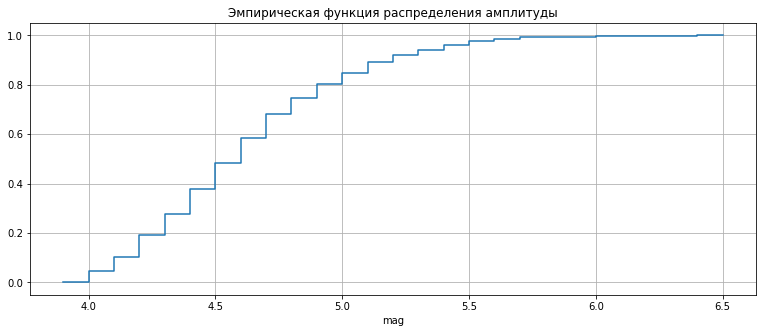

In [2]:
y_un = np.unique(np.array(X["mag"]), return_counts=True)
mag = y_un[0]  # отсортированные значения амплитуд
num = y_un[1].cumsum()/y_un[1].sum()  # значения эмпирической ф.р. в точках из mag
# добавим крайние точки
mag = np.insert(mag.tolist(), [0, y_un[0].size], [mag.min() - 0.1, mag.max() + 0.1])
num = np.insert(num.tolist(), [0, y_un[0].size], [0, 1])
# продублируем точки, чтобы график стал кусочно-гладким
mag = np.repeat(mag, repeats = 2)
num = np.repeat(num, repeats = 2)
mag = np.delete(mag, 0)
num = np.delete(num, num.size - 1)

f, (t) = plt.subplots(1, 1, figsize=(13, 5))
t.plot(mag, num)
t.set_title("Эмпирическая функция распределения амплитуды")
t.set_xlabel(u"mag")
t.grid()

Построим приближенный $95 \%$ доверительный интервал для $F$ по следствию из неравенства Дворецкого-Кифера-Вольфовица.

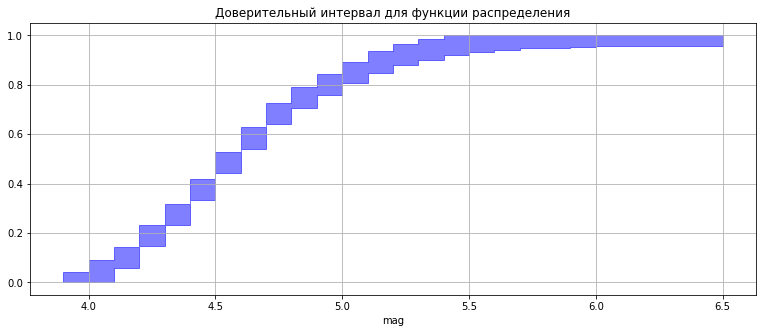

In [3]:
from math import log

epsn = (0.5/X["mag"].size * log(2/0.05)) ** 0.5
Lx = np.where(num - epsn > 0, num - epsn, np.zeros(mag.size))
Ux = np.where(num + epsn < 1, num + epsn, np.ones(mag.size))
f, (t) = plt.subplots(1, 1, figsize=(13, 5))
t.fill_between(mag, Lx, Ux, color='blue', alpha=0.5)
t.set_title("Доверительный интервал для функции распределения")
t.set_xlabel(u"mag")
t.grid()

Подсчитаем и построим приближенный $95\%$ доверительный интервал для значения $F(4.9) − F(4.3)$, используя формулу из пункта b.

In [21]:
from scipy import stats as st

b = 4.9
a = 4.3
th = num[mag == b][1] - num[mag == a][1]
se = (th * (1 - th)/X["mag"].size)**.5
z = st.norm.ppf(.025, 0, 1)
print("Приближенный доверительный интервал для F(4.9) − F(4.3): [" \
      + str(round(th + z * se, 4)) + ", " + str(round(th - z * se, 4)) + "]")

Приближенный доверительный интервал для F(4.9) − F(4.3): [0.4951, 0.5569]


### Задание 2

Рассмотрим выборки $X_1, ..., X_n$ и $Y_1, ..., Y_n$, где $n = 100$, соответсвующие двум группам людей. Будем считать, что $X_j$ (или $Y_j$) принимает значение $1$, если $j$-ый пациент в данной группе выздоровел, иначе $-$ $0$. Тогда $X_i$ $-$ независимые одинаково распределенные случайные величины из распределения Бернулли с параметром $p_1$, а $Y_i$ $-$ $i.i.d.$ из Бернулли с параметром $p_2$.

Получим оценки $\hat{p}_1 = \dfrac1{n} \sum\limits^{n}_{i = 1} X_i = \dfrac{90}{100} = 0.9$ и $\hat{p}_2 = \dfrac1{n} \sum\limits^{n}_{i = 1} Y_i = \dfrac{85}{100} = 0.85$

Поэтому искомая оценка для $\theta = p_1 - p_2$ будет $\hat{\theta} = \hat{p}_1 - \hat{p}_2 = 0.9 - 0.85 = 0.05$

Найдем для нее стандартную ошибку.

$\mathbb{V}\hat{p}_1 = $ [ из независимости $X_i$ ] = $ \dfrac1{n^2} \sum\limits^{n}_{i = 1} \mathbb{V}X_i = \dfrac1{n^2} \sum\limits^{n}_{i = 1} p_1(1-p_1) = \dfrac1{n^2} np_1(1-p_1) = \dfrac{p_1(1-p_1)}{n}$

Аналогично $\mathbb{V}\hat{p}_2 = $ [ из независимости $Y_i$ ] $=  \dfrac1{n^2} \sum\limits^{n}_{i = 1} \mathbb{V}Y_i = \dfrac1{n^2} \sum\limits^{n}_{i = 1} p_2(1-p_2) = \dfrac1{n^2} np_2(1-p_2) = \dfrac{p_2(1-p_2)}{n}$

Откуда $\mathbb{V}\hat{\theta} = \mathbb{V}[\hat{p}_1 - \hat{p}_2] =$ [ из независимости $p_1$ и $p_2$ ] = $\mathbb{V}\hat{p}_1 + \mathbb{V}\hat{p}_1 = \dfrac{p_1(1-p_1)}{n} + \dfrac{p_2(1-p_2)}{n} = \dfrac{p_1(1-p_1) + p_2(1-p_2)}{n}$

Искомая $se = \sqrt{\dfrac{p_1(1-p_1) + p_2(1-p_2)}{n}}$, ее оценка $\hat{se} = \sqrt{\dfrac{\hat{p}_1(1-\hat{p}_1) + \hat{p}_2(1-\hat{p}_2)}{n}} = \sqrt{\dfrac{0.9*0.1 + 0.85*0.15}{100}} \approx 0.047$

Согласно центральной предельной теореме $\hat{\theta} \approx \mathcal{N}(\theta, \hat{se}^2)$. Тогда приближенный доверительный интервал для $\theta$ с доверительной вероятностью $1 - \alpha$ имеет вид: $$\hat{\theta} \pm z_{\alpha/2}\hat{se}$$

Для $\alpha = 0.2$ (вероятности $80 \%$) получим приближенный доверительный интервал $[-0.0098, 0.1098]$

Для $\alpha = 0.05$ (вероятности $95 \%$) получим приближенный доверительный интервал $[-0.0414, 0.1414]$

In [24]:
#Ниже приведены вычисления, использовавшиеся в задании

se = ((0.9*0.1 + 0.85*0.15)/100)**.5
round(se, 3)

0.047

In [25]:
from scipy import stats as st
z1 = st.norm.ppf(.1, 0, 1)
z2 = st.norm.ppf(.025, 0, 1)
th = 0.05
print ("80% доверительный интервал: [" + str(round(th + z1 * se, 4)) + ", " + str(round(th - z1 * se, 4)) + "]")
print ("95% доверительный интервал: [" + str(round(th + z2 * se, 4)) + ", " + str(round(th - z2 * se, 4)) + "]")

80% доверительный интервал: [-0.0098, 0.1098]
95% доверительный интервал: [-0.0414, 0.1414]


### Задание 3

In [57]:
import numpy as np

N = 50
standard_data = np.random.normal(0, 1, N)
log_data = np.exp(standard_data)
log_data

array([ 0.43457146,  0.05311461,  5.39610666,  0.42602509,  0.40435294,
        5.38791756,  1.66196525,  0.2640057 ,  0.86252361,  1.16771155,
        0.13337221,  1.01827117,  0.29508236,  1.28660986,  1.26130085,
        0.94629758,  1.21110126,  0.59527912,  0.16426217,  0.58117182,
        3.37638508,  0.14159539,  0.21260484,  0.65010659,  3.83425386,
        0.44928088,  0.39852588,  0.20408565,  3.06435576,  1.7005716 ,
        0.79885349,  1.09512004,  0.32625981,  1.09175708,  1.77879668,
        0.51617873,  0.48962882,  0.78679329,  0.83781214,  1.26157103,
        1.17470884,  2.57579925,  2.66966812,  2.84936148,  3.52617335,
        0.42964436,  1.40215343,  1.12320859,  4.42340928,  0.50943813])

Заметим, что поскольку $\theta = T(F) = \int r(x) d F(x)$ - линейный статистический функционал, то $\hat\theta = T(\hat{F}_n) = \int r(x) d\hat{F}_n(x) =  \frac1{n} \sum\limits^{n}_{i = 1} r(X_i)$, где $X_1, ... , X_n$ $-$ $i.i.d$ выборка из распределения $F$ с эмпирической функцией распределения $F_n$. Здесь $r(x) = \dfrac{(x-\mu)^3}{\sigma^3}$, $F$ $-$ логнормальное распредление. Используем этот факт для построения оценки на каждом шаге бутстрепа.

Для построения доверительных интервалов применим три подхода на остнове бустрепа:

$1)$ Эфронов доверительный интервал

Для бутстрепа используем статистику $\hat\theta$. В качестве квантилей $q_1^*$ и $q_2^*$ возьмем полученные порядковые статистики $\hat\theta_{[B\alpha/2]}^*$ и $\hat\theta_{[B(1-\alpha/2) + 1]}^*$ соответсвенно. Получим интервал $[q_1^*, q_2^*]$.

$2)$ Квантильный (рецентрированный) доверительный интервал

Для бутстрепа используем статистику $\hat\theta - \theta$, у которой бутстреповским аналогом является $\hat\theta^* - \hat\theta$. В качестве квантилей $q_1^{*\%}$ и $q_2^{*\%}$ возьмем полученные порядковые статистики с номерами $[B\alpha/2]$ и $[B(1-\alpha/2) + 1]$ соответственно. Получим интервал $[\hat\theta - q_2^{*\%}, \hat\theta - q_1^{*\%}]$.

$3)$ T-квантильный доверительный интервал

Для бутстрепа используем статистику $\dfrac{\hat\theta - \theta}{se(\hat\theta)}$, у которой бутстреповским аналогом является
$\dfrac{\hat\theta^* - \hat\theta}{se^*(\hat\theta)}$. В качестве квантилей $q_1^{*\%t}$ и $q_2^{*\%t}$ возьмем полученные порядковые статистики с номерами $[B\alpha/2]$ и $[B(1-\alpha/2) + 1]$ соответственно. Получим интервал $[\hat\theta - se(\hat\theta)q_2^{*\%t}, \hat\theta - se(\hat\theta)q_1^{*\%t}]$.

В данном методе также используем, что в рассматриваем случае $$se(\hat\theta) = \sqrt{\mathbb{V}\hat\theta} = \sqrt{\mathbb{V} \sum\limits^{n}_{i = 1} \dfrac{(X_i-\mu)^3}{\sigma^3}} = \sqrt{\dfrac1{n^2} \sum\limits^{n}_{i = 1}\mathbb{V} \dfrac{(X_i-\mu)^3}{\sigma^3}} = \sqrt{\dfrac1{n^2}n \mathbb{V} \dfrac{(X_1-\mu)^3}{\sigma^3}} = \dfrac1{\sqrt n} se(\dfrac{(X_1-\mu)^3}{\sigma^3})$$
где в качестве оценки последней стандартной ошибки можно использовать выборочную.

In [59]:
B = 50000  # фиксируем количество бутстреп-выборок
alpha = 0.05

values_e = []
values_q = []
values_tq = []

theta_est =  1/N * np.sum((log_data - log_data.mean())**3/(log_data.var()**1.5))  # оценка theta
se_est = (1/N)**.5 * np.std((log_data - log_data.mean())**3/(log_data.var()**1.5))  # оценка se

for i in range (B):
    data = np.random.choice(log_data, N)  # генерируем бутстреп-выборку
    values_e += [1/N * np.sum((data - data.mean())**3/(data.var()**1.5))]
    values_q += [1/N * np.sum((data - data.mean())**3/(data.var()**1.5)) - theta_est] # оценка r(data[i]), cм. формулу выше
    values_tq += [(1/N * np.sum((data - data.mean())**3/(data.var()**1.5)) - theta_est) / \
                 ((1/N)**.5 * np.std((data - data.mean())**3/(data.var()**1.5)))]

values_e = np.sort(np.array(values_e))
values_q = np.sort(np.array(values_q))
values_tq = np.sort(np.array(values_tq))
Xq1 = int(B * alpha/2 - 1)
Xq2 = int(B * (1 - alpha/2))

print("Эфронов 95% доверительный интервал: [" + str(values_e[Xq1]) + ", " + str(values_e[Xq2]) + "]")
print("Квантильный 95% доверительный интервал: [" + str(theta_est - values_q[Xq2]) + ", " + str(theta_est - values_q[Xq1]) + "]")
print("T-квантильный 95% доверительный интервал: [" + str(theta_est - se_est * values_tq[Xq2]) +\
      ", " + str(theta_est - se_est * values_tq[Xq1]) + "]")

Эфронов 95% доверительный интервал: [0.942997741164, 2.33181313301]
Квантильный 95% доверительный интервал: [0.834310897867, 2.22312628972]
T-квантильный 95% доверительный интервал: [1.14962641704, 2.73714603591]


### Задание 4

**a)** Найдем распределение $\hat\theta$: $F_{\hat\theta}(x) = F_{X_{(n)}}(x) = P(X_{(n)} \leq x) = P(X_1 \leq x, X_2 \leq x, ..., X_n \leq x) =$ [из независимости $X_i$] $= \prod\limits^{n}_{i = 1} P(X_i \leq x) = F^n(x)$, где $F(x) = \dfrac{x}{\theta} I\lbrace x \in [0, \theta]\rbrace$. Значит, $F_{\hat\theta}(x) = \dfrac{x^n}{\theta^n} I\lbrace x \in [0, \theta]\rbrace$. Его плотность $f_{\hat\theta}(x) = \dfrac{nx^{n-1}}{\theta^n} I\lbrace x \in [0, \theta]\rbrace$

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N = 50
uni_data = np.random.uniform(0, 1, N)  # генерируем выборку из равномерного распределения на [0, 1] 
uni_data

array([ 0.04684271,  0.06994152,  0.79317903,  0.15668857,  0.80231256,
        0.6082226 ,  0.85319143,  0.44823225,  0.96551698,  0.93408241,
        0.26719604,  0.15125082,  0.87105256,  0.45652741,  0.46140937,
        0.99212911,  0.4097798 ,  0.1416267 ,  0.84282902,  0.05970541,
        0.56687538,  0.61286604,  0.18136865,  0.26374206,  0.8070036 ,
        0.65970093,  0.43024124,  0.33771941,  0.38965242,  0.31029993,
        0.22694643,  0.61578784,  0.27993732,  0.62933888,  0.19667878,
        0.8610192 ,  0.96595863,  0.02456348,  0.41202564,  0.4690654 ,
        0.43563249,  0.21406134,  0.91585658,  0.29462573,  0.77494112,
        0.29739609,  0.18105059,  0.09844718,  0.66288807,  0.87942093])

In [14]:
def f(x):  # определим функцию плотности
    res = N * x**(N-1)
    res[x <= 0] = 0
    res[x > 1] = 0
    return res

Сравним плотность настоящего распределения $\theta$ с гистограммой, полученной с помощью бутстрепа с числом выборок $B = 50000$.

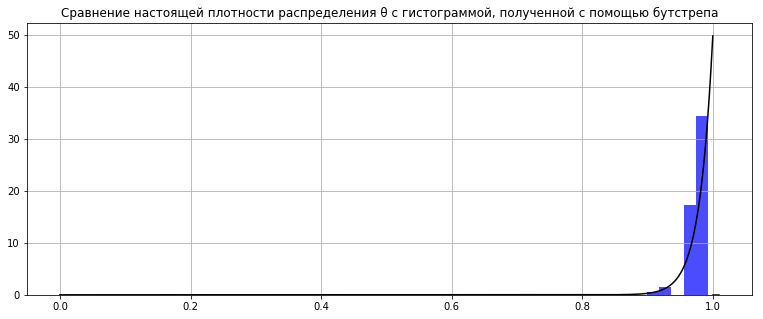

In [15]:
B = 50000
values = []
for i in range (B):
    data = np.random.choice(uni_data, N)  # генерируем бутстреп-выборку
    values += [np.max(data)]
values = np.array(values)

xn = np.arange(0, 1, 0.0001)
(g), t = plt.subplots(1, 1, figsize=(13, 5))
t.hist(values,  color="blue", normed=True, alpha=0.7)
t.plot(xn, f(xn), color='black')
t.plot(np.array([1, 1.01]), np.array([0, 0]), color='black')
t.set_title("Сравнение настоящей плотности распределения θ с гистограммой, полученной с помощью бутстрепа")
t.grid()

Выполнив несколько сравнений видим, что в большинстве случаев бутстреп работает достаточно плохо $-$ гистограмма не заполняет график плотности, а иногда крайний правый столбец далек от $1$.

**b)** Заметим, что поскольку распределение является непрерывным, то $$0 \leq P(\hat\theta = \theta) = P(X_{(n)} = \theta) \leq  \sum\limits^{n}_{i = 1} P(X_i = \theta) = \sum\limits^{n}_{i = 1} 0 = 0$$ и значит $$P(\hat\theta = \theta) = 0$$

В то же время, если $\hat\theta^*$ $-$ оценка, полученная с помощью бутстрепа, т.е. $\hat\theta^* = X_{(n)}^*$, то бутстреповским аналогом для $P(\hat\theta = \theta)$ является вероятность

$$P(\hat\theta^* = \hat\theta) = 1 - P(\hat\theta^* \neq \hat\theta) = 1 - P(X_{(n)}^* \neq \hat\theta) =$$
$$= 1 - P(X_1^* \neq \hat\theta, X_2^* \neq \hat\theta, ..., X_n^* \neq \hat\theta) = \text{ [так как }X_i^*\text{ выбираются независимо] }=$$
$$=1 - \prod\limits^{n}_{i = 1} P(X_i^* \neq \hat\theta) = 
1 - (P(X_1^* \neq \hat\theta))^n = 1 - (1 - P(X_1^* = X_{(n)}))^n =$$
$$ = \text{ [так как }X_i^*\text{ выбираются из начальной выборки равномерно] }= 1 - (1 - \frac1{n})^n \xrightarrow {n \rightarrow \infty} 1 - \dfrac1{e} \approx 0.632$$ (по второму замечательному пределу; при $n = 50$, как в примере, получится примерно $0.636$)

Как следствие, в данном случае бутстреп работает плохо (значения вероятностей должны были быть примерно равны).

### Задание 5

Заметим, что $\mathbb{V} T_n = \mathbb{V} \overline{X}_n^2 = \mathbb{E} \overline{X}_n^4 - (\mathbb{E} \overline{X}_n^2)^2 = \dfrac1{n^4} \mathbb{E} (\sum\limits^{n}_{i = 1}X_i)^4 - \left(\dfrac1{n^2}\mathbb{E} ( \sum\limits^{n}_{i = 1}X_i)^2 \right) ^2 = \dfrac1{n^4} \left(\mathbb{E} (\sum\limits^{n}_{i = 1}X_i)^4 - \left(\mathbb{E} ( \sum\limits^{n}_{i = 1}X_i)^2 \right) ^2\right)$

Найдем сначала $\mathbb{E} (\sum\limits^{n}_{i = 1}X_i)^4 = \mathbb{E} (X_1 + X_2 + ... + X_n)^4$

По полиномиальной теореме $(X_1 + X_2 + ... + X_n)^4 = \sum\limits^{}_{\alpha_1 + \alpha_2 + ... + \alpha_n = 4} \dfrac{4!}{\alpha_1!\alpha_2! ... \alpha_n!}X_1^{\alpha_1}X_2^{\alpha_2} ... X_n^{\alpha_n}$

Поэтому т.к. $X_i$ одинаково распределенные с.в., то $$\mathbb{E} (X_1 + X_2 + ... + X_n)^4 = n \dfrac{4!}{4!} \mathbb{E} X_i^4 + n(n-1)\dfrac{4!}{3! 1!} \mathbb{E} X_i^3 X_j + \dfrac{n(n-1)}{2} \dfrac{4!}{2! 2!} \mathbb{E} X_i^2 X_j^2 + n \dfrac{(n-1)(n-2)}{2} \dfrac{4!}{2! 1! 1!} \mathbb{E} X_i^2 X_j X_k + C_n^4 4! \mathbb{E}X_i X_j X_k X_m  \circeq$$

Индексы в каждом слагаемом различны; каждое слагаемое соответсвует фиксированному разбиению числа $4$ на сумму, отраженному в степени при $X_i$, и выборе номеров полученных слагаемых для $\alpha_i$.

Например, разбиению $2+1+1$ соответствует четвертое слагаемое (см. степени), а способов зафисировать для такого разбиения конкретные индексы $\alpha_i$ всего: $n$(выбрать индекс элемента, который берется 2 раза) $\cdot \dfrac{(n-1)(n-2)}{2}$ (зафиксировать произвольные два различных индекса из оставшихся, т.е. $C_{n-1}^2$). Аналогично подсчитано для других слагаемых (там формулы уже более простые).

Таким образом, т.к. $X_i$ $-$ независимы:
$$ \circeq n\mathbb{E}X^4 + 4n(n-1)\mathbb{E}X^3\mathbb{E}X + 3n(n-1)\mathbb{E}X^2\mathbb{E}X^2 + 6n(n-1)(n-2)\mathbb{E}X^2(\mathbb{E}X)^2 + n(n-1)(n-2)(n-3)(\mathbb{E}X)^4 =$$
$$ = n\mathbb{E}X^4 + (4n^2-4n)\mathbb{E}X^3\mathbb{E}X + (3n^2-3n)\mathbb{E}X^2\mathbb{E}X^2 + (6n^3-18n^2+12n)\mathbb{E}X^2(\mathbb{E}X)^2 + (n^4-6n^3+11n^2-6n)(\mathbb{E}X)^4$$

Найдем теперь $$\left(\mathbb{E} (\sum\limits^{n}_{i = 1}X_i)^2\right)^2 = \left(\mathbb{E} (\sum\limits^{n}_{i = 1}X_i^2 + \sum\limits^{}_{i \neq j} X_i X_j)\right)^2 = \left(n\mathbb{E}X^2 + n(n-1)(\mathbb{E}X)^2\right)^2 = n^2\mathbb{E}X^2\mathbb{E}X^2 + 2n^2(n-1)\mathbb{E}X^2(\mathbb{E}X)^2 + n^2(n-1)^2(EX)^4 =$$ $$= n^2\mathbb{E}X^2\mathbb{E}X^2 + (2n^3-2n^2)\mathbb{E}X^2(\mathbb{E}X)^2 +(n^4-2n^3+n^2)(\mathbb{E}X)^4$$

Поэтому получим $$\mathbb{V} T_n = \dfrac1{n^4} \left(n\mathbb{E}X^4 + (4n^2-4n)\mathbb{E}X^3\mathbb{E}X + (2n^2-3n)\mathbb{E}X^2\mathbb{E}X^2 + (4n^3-16n^2+12n)\mathbb{E}X^2(\mathbb{E}X)^2 + (-4n^3+10n^2-6n)(\mathbb{E}X)^4\right) = $$
$$ = \dfrac1{n^3}\mathbb{E}X^4 + \dfrac{4n-4}{n^3}\mathbb{E}X^3\mathbb{E}X + \dfrac{2n-3}{n^3}\mathbb{E}X^2\mathbb{E}X^2 + \dfrac{4n^2-16n+12}{n^3}\mathbb{E}X^2(\mathbb{E}X)^2 + \dfrac{-4n^2+10n-6}{n^3}(\mathbb{E}X)^4 $$

Выразим теоретические центральные моменты через начальные теоретические моменты:
$$\mathbb{E}(X-\mathbb{E}X)^2 = \mathbb{E}(X^2-2X\mathbb{E}X+(\mathbb{E}X)^2)= \mathbb{E}X^2-(\mathbb{E}X)^2$$
$$\mathbb{E}(X-\mathbb{E}X)^3 = \mathbb{E}(X^3 -3X^2\mathbb{E}X+3X(\mathbb{E}X)^2-(\mathbb{E}X)^3) = \mathbb{E}X^3-3\mathbb{E}X^2\mathbb{E}X+2(\mathbb{E}X)^3$$
$$\mathbb{E}(X-\mathbb{E}X)^4 = \mathbb{E}(X^4-4X^3\mathbb{E}X+6X^2(\mathbb{E}X)^2-4X(\mathbb{E}X)^3+(\mathbb{E}X)^4) = \mathbb{E}X^4 - 4\mathbb{E}X^3\mathbb{E}X + 6\mathbb{E}X^2(\mathbb{E}X)^2-3(\mathbb{E}X)^4$$

$v_{boot} = \dfrac{4\overline{X}_n^2 \hat{\alpha}_2}{n} + \dfrac{4\overline{X}_n \hat{\alpha}_3}{n^2} + \dfrac{\hat{\alpha}_4}{n^3} + \dfrac{\hat{\alpha}_2^2(2n-3)}{n^3}$ является бутстреповским аналогом (оценкой с помощью бутстрепа) для
$$ \dfrac{4(\mathbb{E}X)^2 \mathbb{E}(X-\mathbb{E}X)^2}{n} + \dfrac{4\mathbb{E}X \mathbb{E}(X-\mathbb{E}X)^3}{n^2} + \dfrac{\mathbb{E}(X-\mathbb{E}X)^4}{n^3} + \dfrac{\left(\mathbb{E}(X-\mathbb{E}X)^2\right)^2(2n-3)}{n^3} = $$

что по формулам выше для центральных моментов можно преобразовать как

$$ = \dfrac{4(\mathbb{E}X)^2 \left(\mathbb{E}X^2-(\mathbb{E}X)^2\right)}{n} + \dfrac{4\mathbb{E}X \left(\mathbb{E}X^3-3\mathbb{E}X^2\mathbb{E}X+2(\mathbb{E}X)^3\right)}{n^2} + \dfrac{\mathbb{E}X^4 - 4\mathbb{E}X^3\mathbb{E}X + 6\mathbb{E}X^2(\mathbb{E}X)^2-3(\mathbb{E}X)^4}{n^3} + \dfrac{\left(\mathbb{E}X^2-(\mathbb{E}X)^2\right)^2(2n-3)}{n^3} = $$
$$ = \dfrac{4\mathbb{E}X^2(\mathbb{E}X)^2-4(\mathbb{E}X)^4}{n} + \dfrac{4\mathbb{E}X^3\mathbb{E}X -12\mathbb{E}X^2(\mathbb{E}X)^2+8(\mathbb{E}X)^4}{n^2} + \dfrac{\mathbb{E}X^4 - 4\mathbb{E}X^3\mathbb{E}X + 6\mathbb{E}X^2(\mathbb{E}X)^2-3(\mathbb{E}X)^4}{n^3} + \dfrac{\left(\mathbb{E}X^2\mathbb{E}X^2-2\mathbb{E}X^2(\mathbb{E}X)^2+(\mathbb{E}X)^4\right)(2n-3)}{n^3} = $$
$$ = \dfrac1{n^3}\mathbb{E}X^4 + \left(\dfrac4{n^2} - \dfrac4{n^3}\right)\mathbb{E}X^3\mathbb{E}X + \dfrac{2n-3}{n^3}\mathbb{E}X^2\mathbb{E}X^2 + \left(\dfrac4{n} - \dfrac{12}{n^2} + \dfrac{6}{n^3} - \dfrac{4n-6}{n^3}\right)\mathbb{E}X^2(\mathbb{E}X)^2 + \left(-\dfrac4{n} + \dfrac{8}{n^2} - \dfrac{3}{n^3} + \dfrac{2n-3}{n^3}\right)(\mathbb{E}X)^4 =$$
$$ = \dfrac1{n^3}\mathbb{E}X^4 + \dfrac{4n-4}{n^3}\mathbb{E}X^3\mathbb{E}X  + \dfrac{2n-3}{n^3}\mathbb{E}X^2\mathbb{E}X^2 + \dfrac{4n^2 - 12n + 6 - 4n + 6}{n^3}\mathbb{E}X^2(\mathbb{E}X)^2  + \dfrac{-4n^2+8n-3+2n-3}{n^3}(\mathbb{E}X)^4= \mathbb{V} T_n$$
что и требовалось доказать.